In [15]:
import numpy as np
import pickle
import os

file_root = '/Users/niladri/Desktop/Research/deep_linear_networks_ols/Benign-Overfitting-in-Deep-Linear-Networks/results/logs/'

results = {}
keys = ['500', '1000', '2000']

for key in keys:
    filename = 'exp_2_dimension_' + key
    filename = os.path.join(file_root, filename)
    filename = os.path.join(filename, 'result.pickle')
    
    with (open(filename, "rb")) as file:
        results[key] = pickle.load(file)

In [18]:
# Extract the dimensions from the data
alphas = []

for j in range(10):
    alphas.append(results[keys[0]][j]['alpha'])

# Calculate average and standard deviations for the results

average_distance = np.zeros((len(keys),len(alphas)))
average_risk = np.zeros((len(keys),len(alphas)))
average_risk_ols = np.zeros((len(keys),len(alphas)))
average_training_loss = np.zeros((len(keys),len(alphas)))

ci_distance = np.zeros((len(keys),len(alphas)))
ci_risk = np.zeros((len(keys),len(alphas)))
ci_risk_ols = np.zeros((len(keys),len(alphas)))


for i in range(len(keys)):
    for j in range(len(alphas)):
        # Calculate averages
        average_distance[i,j] = np.mean(results[keys[i]][j]['distance'])
        average_risk[i,j] = np.mean(results[keys[i]][j]['risk'])
        average_risk_ols[i,j] = np.mean(results[keys[i]][j]['risk_ols'])
        average_training_loss[i,j] = np.mean(results[keys[i]][j]['training_loss'])

        # Calculate standard deviations
        ci_distance[i,j] = 1.96*np.std(results[keys[i]][j]['distance'],ddof=1)/np.sqrt(len(results[keys[i]][j]['distance']))
        ci_risk[i,j] = 1.96*np.std(results[keys[i]][j]['risk'],ddof=1)/np.sqrt(len(results[keys[i]][j]['risk']))
        ci_risk_ols[i,j] = 1.96*np.std(results[keys[i]][j]['risk_ols'],ddof=1)/np.sqrt(len(results[keys[i]][j]['risk_ols']))

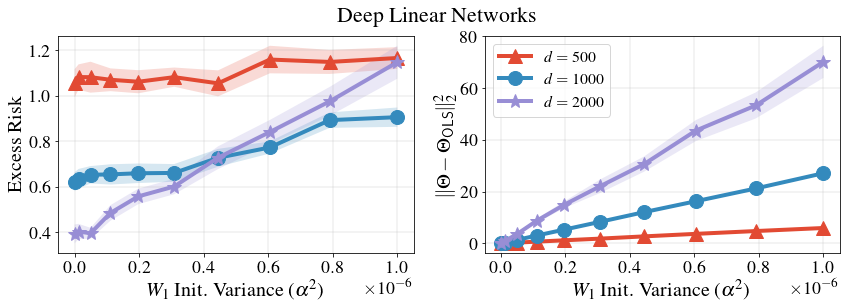

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import FormatStrFormatter

palette = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']
sns.set_palette(palette)


plt.rc('text', usetex=True)
#style.use('fivethirtyeight')
plt.rc('font', family='times')
#csfont = {'fontname':'Times New Roman'}
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

minority_samples=[0,500,1000,1500]
minority_samples_both=[0,100,200,300,400,500]
majority_samples=[0,500,1000,1500,2000]
majority_samples_both=[0,500,1000,1500,2000]

fig = plt.figure(figsize=(14, 4))
fig.set_facecolor('white')
fig.patch.set_facecolor('white')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_facecolor("#e1ddbf")
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.set_facecolor("#e1ddbf")
plt.locator_params(axis="y", nbins=6)


ax1.plot(np.array(alphas)**2,average_risk[0,:],'^',markersize = 14,markevery=1,linewidth=4,label=r'$d=500$',linestyle='solid')
ax1.fill_between(np.array(alphas)**2,average_risk[0,:]-ci_risk[0,:],average_risk[0,:]+ci_risk[0,:], alpha=.2)
ax1.plot(np.array(alphas)**2,average_risk[1,:],'o',markersize = 14,markevery=1,linewidth=4,label=r'$d=1000$',linestyle='solid')
ax1.fill_between(np.array(alphas)**2,average_risk[1,:]-ci_risk[1,:],average_risk[1,:]+ci_risk[1,:], alpha=.2)
ax1.plot(np.array(alphas)**2,average_risk[2,:],'*',markersize = 14,markevery=1,linewidth=4,label=r'$d=2000$',linestyle='solid')
ax1.fill_between(np.array(alphas)**2,average_risk[2,:]-ci_risk[2,:],average_risk[2,:]+ci_risk[2,:], alpha=.2)







ax2.plot(np.array(alphas)**2,average_distance[0,:],'^',markersize = 14,markevery=1,linewidth=4,label=r'$d=500$',linestyle='solid')
ax2.fill_between(np.array(alphas)**2,average_distance[0,:]-ci_distance[0,:],average_distance[0,:]+ci_distance[0,:], alpha=.2)
ax2.plot(np.array(alphas)**2,average_distance[1,:],'o',markersize = 14,markevery=1,linewidth=4,label=r'$d=1000$',linestyle='solid')
ax2.fill_between(np.array(alphas)**2,average_distance[1,:]-ci_distance[1,:],average_distance[1,:]+ci_distance[1,:], alpha=.2)
ax2.plot(np.array(alphas)**2,average_distance[2,:],'*',markersize = 14,markevery=1,linewidth=4,label=r'$d=2000$',linestyle='solid')
ax2.fill_between(np.array(alphas)**2,average_distance[2,:]-ci_distance[2,:],average_distance[2,:]+ci_distance[2,:], alpha=.2)



ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax1.grid(True, linewidth=0.3)
ax2.grid(True, linewidth=0.3)

ax1.set_xlabel(r'$W_1$ Init. Variance ($\alpha^2$)',size=20)
ax2.set_xlabel(r'$W_1$ Init. Variance ($\alpha^2$)',size=20)
#ax1.set_xticks([0, 1, 2, 3, 4, 5])

#ax1.set_ylim(60, 69)
#ax2.set_ylim(60, 69)

fig.suptitle(r'Deep Linear Networks', fontsize=22)
ax1.set_ylabel("Excess Risk",size=20)
ax2.set_ylabel(r'$\|\Theta - \Theta_{\mathsf{OLS}}\|_2^2$',size=20)
#ax1.set_title("Test Error vs. Importance Weight " r'$(w=\tau^{\rho})$',size=18)
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
#handles = [handles[1], handles[2], handles[0]]
#labels = [labels[1], labels[2], labels[0]]
#ax1.legend(handles1, labels1, loc='lower right',prop={'size': 16},facecolor='white')
ax2.legend(handles2, labels2, loc='upper left',prop={'size': 16},facecolor='white')
#ax1.legend(loc='best',prop={'size': 12},facecolor='white')
plt.savefig('scaling_alpha.png', bbox_inches='tight',dpi=1000)
plt.show()